In [26]:
%matplotlib inline
from fastai.vision.all import *
import pandas as pd
import numpy as np
from PIL import Image
import glob
import os
pd.options.mode.chained_assignment = None

In [5]:
home_folder = os.getcwd()
path = Path("samplemovieposters")/"SampleMoviePosters"
fns = get_image_files(path)
cam_fn = fns[1]
fns

(#9078) [Path('samplemovieposters/SampleMoviePosters/50105.jpg'),Path('samplemovieposters/SampleMoviePosters/280460.jpg'),Path('samplemovieposters/SampleMoviePosters/100530.jpg'),Path('samplemovieposters/SampleMoviePosters/113097.jpg'),Path('samplemovieposters/SampleMoviePosters/24768.jpg'),Path('samplemovieposters/SampleMoviePosters/21025.jpg'),Path('samplemovieposters/SampleMoviePosters/248845.jpg'),Path('samplemovieposters/SampleMoviePosters/19071.jpg'),Path('samplemovieposters/SampleMoviePosters/98067.jpg'),Path('samplemovieposters/SampleMoviePosters/47577.jpg')...]

In [9]:
data_file = os.path.join(home_folder,"MovieGenre.csv")
df=pd.read_csv(data_file, engine='python', encoding='latin-1',index_col=False).dropna().drop_duplicates()
df.head(5)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,"https://images-na.ssl-images-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UX182_CR0,0,182,268_AL_.jpg"
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,"https://images-na.ssl-images-amazon.com/images/M/MV5BZTk2ZmUwYmEtNTcwZS00YmMyLWFkYjMtNTRmZDA3YWExMjc2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UY268_CR10,0,182,268_AL_.jpg"
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMjQxM2YyNjMtZjUxYy00OGYyLTg0MmQtNGE2YzNjYmUyZTY1XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTczMTMyMTgyM15BMl5BanBnXkFtZTcwOTc4OTQyMQ@@._V1_UY268_CR4,0,182,268_AL_.jpg"
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BOTEyNzg5NjYtNDU4OS00MWYxLWJhMTItYWU4NTkyNDBmM2Y0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"


In [24]:
posters_path = os.path.join(home_folder,"samplemovieposters/SampleMoviePosters/")
def image_exists(imdbid):
    filepath = f'{posters_path}{imdbid}.jpg'
    return os.path.isfile(filepath)
df_only_files= df[df["imdbId"].apply(image_exists)]
len(df_only_files)

9072

In [27]:
df_only_files['imdbId'] = df_only_files['imdbId'].apply(lambda x: str(x))
idtogenre = df_only_files[["imdbId","Genre"]].astype('string')

In [35]:
movies = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=ColReader(0, pref=posters_path, suff='.jpg'), 
                   splitter=RandomSplitter(),get_y=ColReader(1, label_delim='|'))
dls = movies.dataloaders(idtogenre)

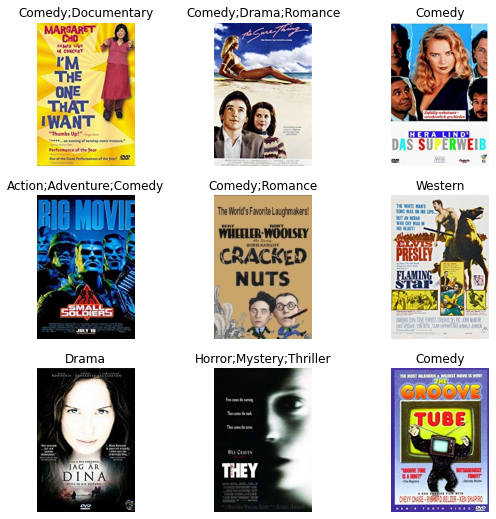

In [36]:
dls.show_batch()

In [33]:
from fastai.metrics import accuracy_multi
learn = vision_learner(dls, resnet34,metrics=[accuracy_multi])
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.747448,0.347728,0.888572,00:22


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.349335,0.263808,0.911150,00:28
1,0.279637,0.243270,0.912228,00:27
2,0.245975,0.241298,0.912396,00:29
3,0.213731,0.247364,0.911222,00:29
4,0.171173,0.261936,0.909664,00:28
5,0.128621,0.275916,0.909161,00:29
6,0.090885,0.291478,0.908346,00:29
7,0.065280,0.306643,0.908370,00:29
8,0.051413,0.311466,0.908609,00:29
9,0.044957,0.311002,0.908538,00:29


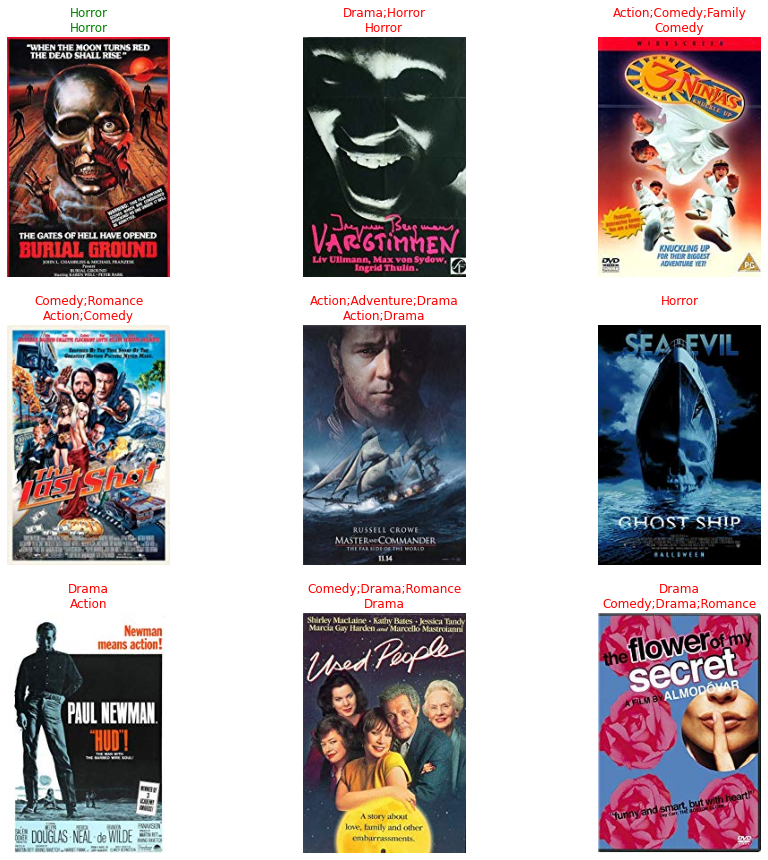

In [34]:
learn.show_results(figsize=(15,15))